In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [3]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,EclipseLink,Spring,JDBC,mybatis,Hibernate,jOOQ,JPA
0,Activiti,automation,0,1,0,1,1,0,1
1,che,software development,1,1,0,1,1,0,1
2,pinpoint,monitoring,0,1,0,1,0,0,0
3,skywalking,monitoring,0,0,0,0,1,0,1
4,storm,hpc,0,1,0,1,0,1,0


In [4]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

mybatis        14
Hibernate      11
Spring          6
JPA             6
EclipseLink     2
jOOQ            1
JDBC            0
dtype: int64

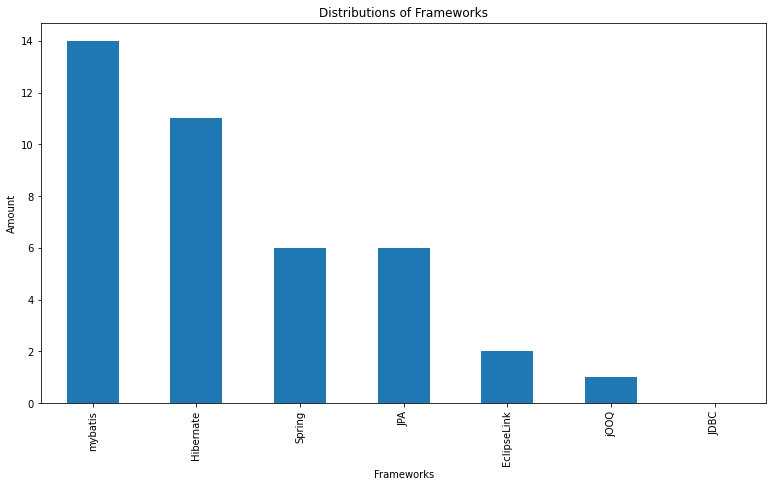

In [23]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks")
plt.xlabel("Frameworks")
plt.ylabel("Amount")
plt.show() 

<AxesSubplot:title={'center':'Histogram - Frequency distributions of Databases'}, ylabel='Frequency'>

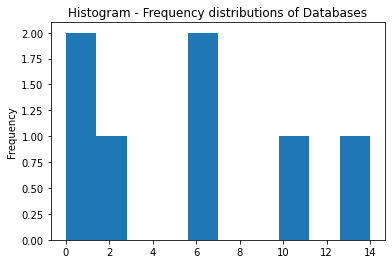

In [6]:
df.iloc[: , 2:].sum().plot(kind='hist', title="Histogram - Frequency distributions of Databases")

In [7]:
df.Domains.value_counts()

software development         4
automation                   2
monitoring                   2
hpc                          2
scm                          2
infrastructure management    1
operating system             1
security                     1
Name: Domains, dtype: int64

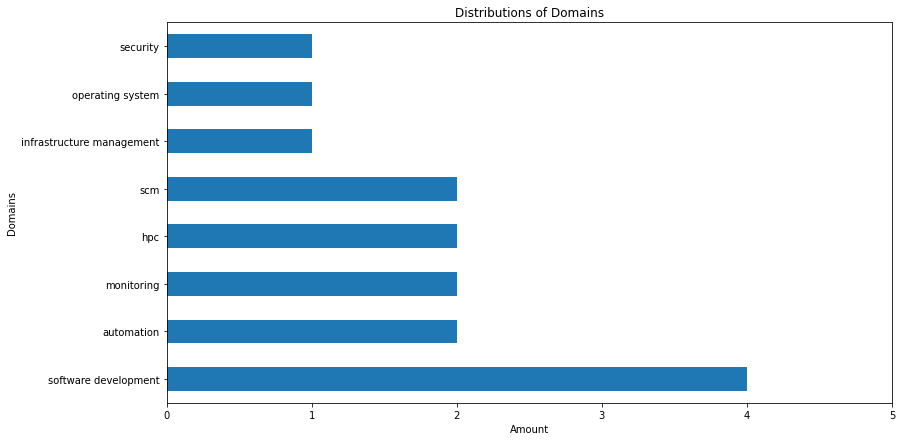

In [22]:
plt.figure(figsize=(13,7))
df.Domains.value_counts().plot(kind='barh', title = 'Distributions of Domains')
plt.xlim(0,5)
plt.xlabel("Amount")
plt.ylabel("Domains")
plt.show() 

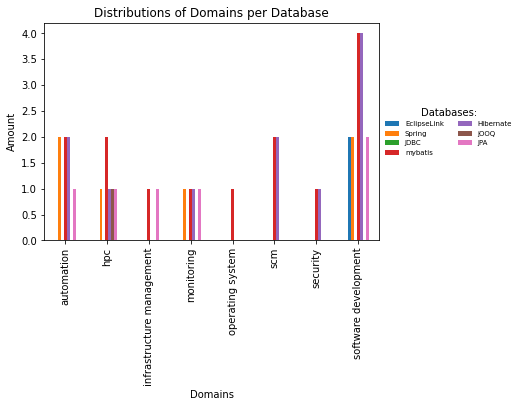

In [24]:
df.groupby(df.Domains).sum().plot(kind='bar')
plt.legend(title = "Databases:", frameon=False, ncol=2, prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Distributions of Domains per Database")
plt.ylabel("Amount")
plt.show() 

In [25]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.head()

<ipython-input-25-a1a100043480>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[:,'SumPerProject'] = df.sum(axis=1)


,Projects,Domains,EclipseLink,Spring,JDBC,mybatis,Hibernate,jOOQ,JPA,SumPerProject
0,Activiti,automation,0,1,0,1,1,0,1,4
1,che,software development,1,1,0,1,1,0,1,5
2,pinpoint,monitoring,0,1,0,1,0,0,0,2
3,skywalking,monitoring,0,0,0,0,1,0,1,2
4,storm,hpc,0,1,0,1,0,1,0,3


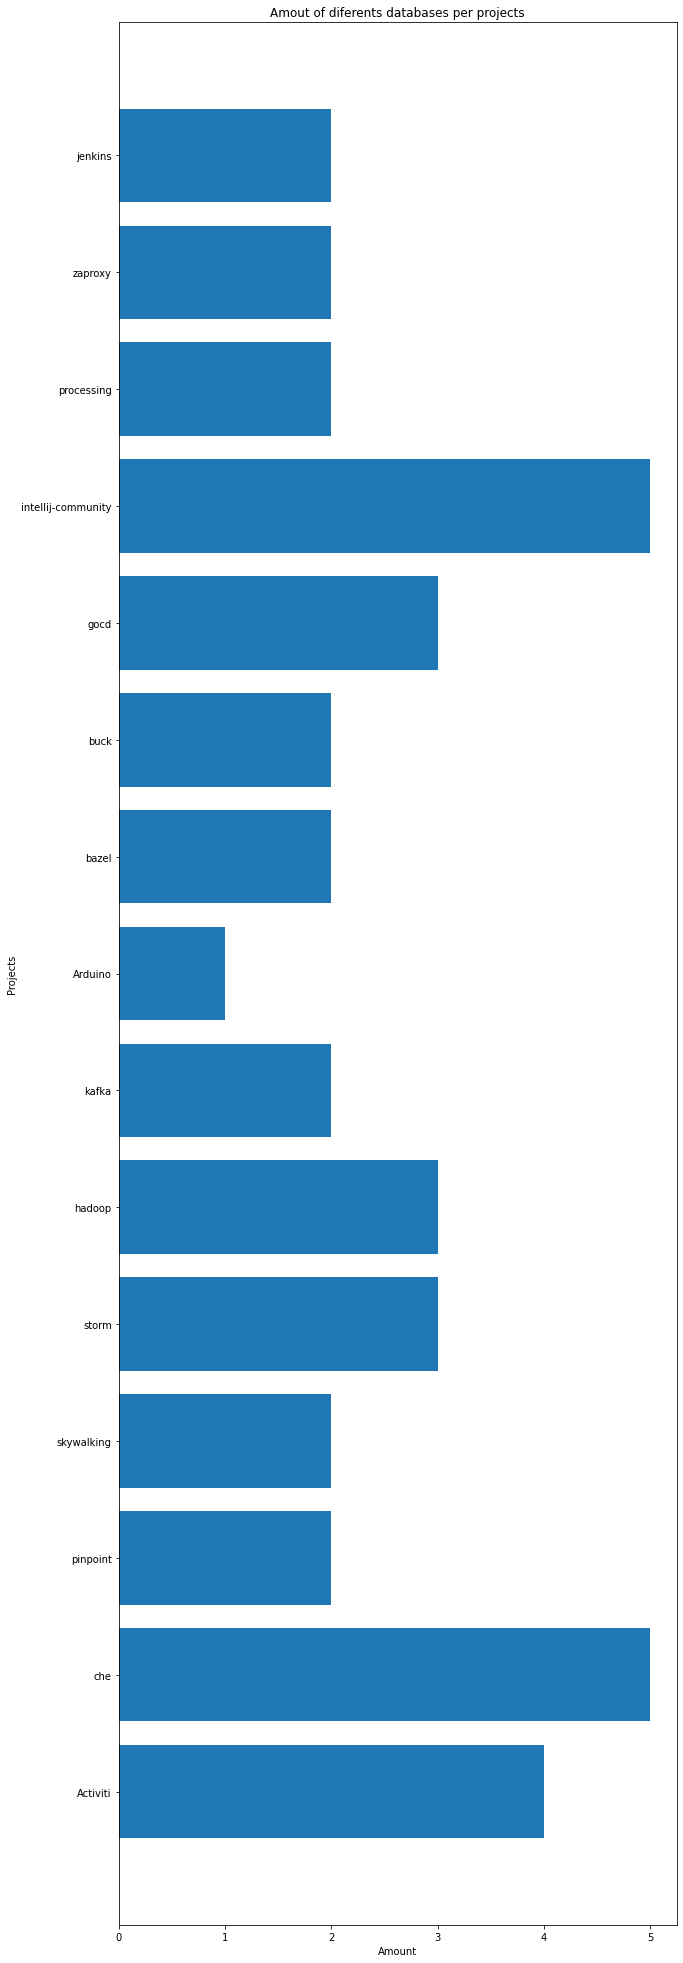

In [ ]:
plt.figure(figsize=(10,35))
plt.barh(df.Projects, df.SumPerProject)
plt.title("Amout of diferents databases per projects")
plt.xlabel("Amount")
plt.ylabel("Projects")
plt.show()